# Chapter 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from io import StringIO

In [5]:
df_str = ',x_coordinate,y_coordinate,x_scaled,y_scaled\n0,17,4,0.5093490504878759,0.0900098453652847\n1,20,6,0.59923417704456,0.13501476804792703\n2,35,0,1.04865980982798,0.0\n3,14,0,0.419463923931192,0.0\n4,37,4,1.1085832275324359,0.0900098453652847\n5,33,3,0.9887363921235239,0.06750738402396352\n6,14,1,0.419463923931192,0.022502461341321174\n7,30,6,0.8988512655668399,0.13501476804792703\n8,35,5,1.04865980982798,0.11251230670660586\n9,17,4,0.5093490504878759,0.0900098453652847\n10,11,6,0.32957879737450796,0.13501476804792703\n11,21,10,0.629195885896788,0.22502461341321173\n12,13,8,0.389502215078964,0.1800196907305694\n13,10,10,0.29961708852228,0.22502461341321173\n14,81,97,2.426898417030468,2.182738750108154\n15,84,94,2.516783543587152,2.11523136608419\n16,87,99,2.606668670143836,2.227743672790796\n17,83,95,2.486821834734924,2.1377338274255115\n18,90,95,2.69655379670052,2.1377338274255115\n19,97,97,2.9062857586661157,2.182738750108154\n20,94,99,2.8164006321094317,2.227743672790796\n21,88,99,2.6366303789960637,2.227743672790796\n22,89,94,2.666592087848292,2.11523136608419\n23,93,99,2.786438923257204,2.227743672790796\n24,92,90,2.756477214404976,2.0252215207189055\n25,82,98,2.4568601258826956,2.205241211449475\n26,81,100,2.426898417030468,2.250246134132117\n27,92,93,2.756477214404976,2.092728904742869\n28,91,98,2.7265155055527477,2.205241211449475\n29,22,15,0.6591575947490159,0.3375369201198176\n30,23,10,0.689119303601244,0.22502461341321173\n31,25,0,0.7490427213056999,0.0\n32,25,10,0.7490427213056999,0.22502461341321173\n33,27,7,0.8089661390101559,0.15751722938924823\n34,17,17,0.5093490504878759,0.38254184280245995\n35,17,15,0.5093490504878759,0.3375369201198176\n'
comic_con = pd.read_csv(StringIO(df_str))
comic_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    36 non-null     int64  
 1   x_coordinate  36 non-null     int64  
 2   y_coordinate  36 non-null     int64  
 3   x_scaled      36 non-null     float64
 4   y_scaled      36 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.5 KB


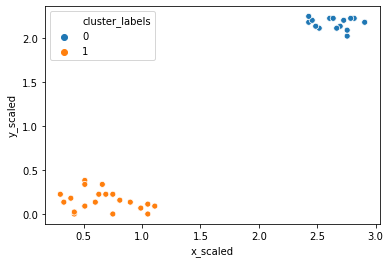

In [8]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [10]:
fifa = pd.read_csv('fifa.csv')
fifa['scaled_sliding_tackle'] = fifa['sliding_tackle']/fifa['sliding_tackle'].std()
fifa['scaled_aggression'] = fifa[
    'aggression']/fifa['aggression'].std()

In [11]:
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 3)

14.2 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
distortion_list

array([0.16310319, 0.06342074, 0.41644944, 0.28454635, 0.45214327,
       0.33862882, 0.27326413, 0.23880845, 0.38998801, 0.16310319,
       0.33139556, 0.0803235 , 0.27262165, 0.36846165, 0.21805227,
       0.13936688, 0.06848377, 0.16121275, 0.06153324, 0.26194067,
       0.18099237, 0.05756342, 0.05969664, 0.15284721, 0.18353986,
       0.19090402, 0.23178523, 0.13637203, 0.08886707, 0.18645442,
       0.07925196, 0.17507842, 0.11528883, 0.14852102, 0.2764833 ,
       0.24007359])

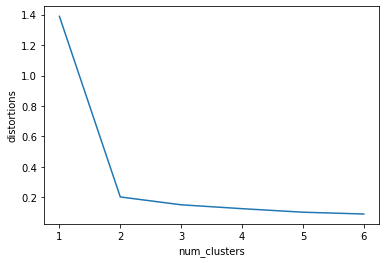

In [17]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [16]:
num_clusters

range(1, 7)

In [18]:
x = [39,
 42,
 58,
 43,
 13,
 32,
 60,
 13,
 26,
 27,
 29,
 51,
 14,
 50,
 62,
 59,
 50,
 62,
 65,
 17,
 25,
 45,
 55,
 48,
 42,
 58,
 68,
 58,
 37,
 55]

In [19]:
y = [3,
 7,
 3,
 3,
 6,
 5,
 3,
 4,
 0,
 9,
 6,
 3,
 0,
 7,
 4,
 1,
 3,
 0,
 2,
 5,
 9,
 5,
 8,
 6,
 3,
 1,
 4,
 2,
 8,
 7]

In [20]:
from scipy.cluster.vq import whiten
uniform_data = pd.DataFrame({'x': x, 'y': y})
uniform_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       30 non-null     int64
 1   y       30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [28]:
uniform_data['x_scaled'] = whiten(uniform_data['x'])
uniform_data['y_scaled'] = whiten(uniform_data['y'])

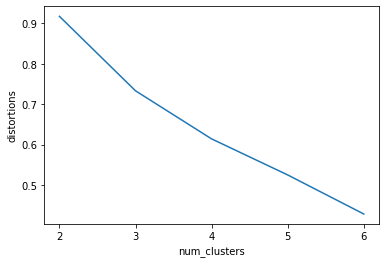

In [29]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

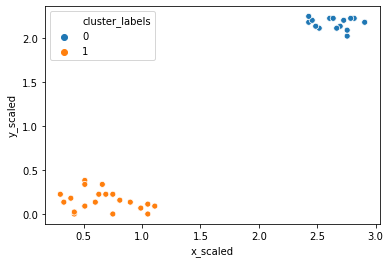

In [32]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

In [34]:
df_str = ',x_coordinate,y_coordinate,x_scaled,y_scaled\n0,33.875528010208775,44.89342094946078,2.209458273773183,2.977523635649635\n1,38.208747889149606,41.11632695012222,2.492083197308515,2.7270106112632395\n2,35.740587879668375,57.41800587821296,2.331102782411336,3.808207661579468\n3,32.54696342954206,57.21808248658115,2.122805513582657,3.794947887400684\n4,62.06314582832662,47.19694447881652,4.047934869250256,3.1303031656759415\n5,53.769683890896005,35.9519591663506,3.5070116963226825,2.384487657695536\n6,32.49035021952977,42.0218536061098,2.119113039026133,2.7870690109995637\n7,55.3252017626829,52.548322206341886,3.608466995581365,3.485229418342975\n8,68.10254176198403,52.31212455866878,4.441841447184339,3.46956378039965\n9,53.283123547122216,31.63628689308561,3.4752768469967337,2.0982538192934608\n10,67.71803005072717,47.605248069586594,4.416762499882229,3.157383605667519\n11,32.845502853646536,54.23496141308666,2.1422771038243305,3.5970945423786214\n12,61.78083409365266,60.824987602248825,4.0295216950623685,4.034173257317054\n13,62.072467329911454,65.23558661122223,4.048542844092579,4.3267030427253745\n14,37.2423104965403,48.237577085508796,2.429049402158786,3.19932236975803\n15,48.39279681160971,67.52456486435298,3.156315829947019,4.478517867838779\n16,35.48978845302275,54.10211413900534,2.314744930569359,3.5882835431243194\n17,65.60854565818534,51.8513512002574,4.279175928741777,3.4390033210643716\n18,38.02888393506392,39.82817720810414,2.480351958716797,2.6415750124160793\n19,65.49367503080025,44.28386899368546,4.271683739748797,2.9370955435797366\n20,41.60372438786939,60.21348801168716,2.7135132193616447,3.9936159897802996\n21,48.41398475297436,45.355137861258946,3.157697767738165,3.0081466754800332\n22,41.81966990296046,35.81066078526795,2.7275977999727097,2.3751161448890996\n23,51.769182700772454,56.95992181229278,3.3765333195759184,3.7778255676212615\n24,45.179950587632945,61.05673695261803,2.9467648623639557,4.049543865162858\n25,38.02218596797351,44.34557019681759,2.479915098255142,2.9411878311975763\n26,56.37185205882892,49.53371077686823,3.6767325044132884,3.2852874982638114\n27,52.05250382127925,57.76601797690635,3.3950123287783662,3.8312893120181397\n28,44.24373638076516,41.7427565034216,2.8857023093385195,2.7685580977672894\n29,40.33281190433085,52.07742896956642,2.6306206928997806,3.4539977654033396\n30,53.59657550320356,55.58701182345966,3.4957210749829546,3.686768306781816\n31,45.872652957168775,43.81629666563168,2.991944880847269,2.9060841475062866\n32,54.000011702824835,61.46690780645113,3.5220343312346123,4.076748150024944\n33,52.6886879008935,44.3775923583563,3.43650606366341,2.943311677873316\n34,53.25422917515853,44.722751130263774,3.4733922738859793,2.9662040834791013\n35,63.54212627168273,47.98225455002846,4.144398179765656,3.18238828747986\n36,65.38884629108937,47.73690085784043,4.2648465112275575,3.16611538151428\n37,49.7331204244559,46.049823776856826,3.243735547657223,3.0542212157868227\n38,48.58080531427996,56.78708412569725,3.1685782791593025,3.7663622332153466\n39,48.03000662249777,56.60380297058407,3.1326536220919694,3.7542062433224617\n40,44.667125096576456,61.716042124809185,2.9133169254380697,4.093271803283573\n41,65.30935895573465,56.52781556973503,4.259662121165602,3.7491664339861606\n42,40.58584806552085,45.81317068292476,2.647124430929681,3.0385253707001767\n43,43.935337781568315,49.107768819361304,2.865587675659299,3.257037206370941\n44,32.873749638659994,41.14505631914088,2.1441194394725502,2.7289160658595075\n45,43.17638645624066,64.84595736862047,2.8160867118770967,4.300861165353343\n46,61.44735547191348,62.46952021318698,4.007771270989095,4.143245691876617\n47,47.902126357633676,58.299124711890485,3.1243129075451397,3.8666472301755963\n48,47.572750544262746,48.533208073849394,3.102830080301418,3.218929880983462\n49,50.65221646915222,48.79467674278415,3.3036816054643374,3.236271601112376\n50,45.446521013813914,40.65821117776538,2.964151343645998,2.6966264143985814\n51,48.17757170967687,30.466588286384656,3.142278236730881,2.020674406221792\n52,50.11893027842959,65.1805398242621,3.2688991635190483,4.323052104441459\n53,37.33082580526986,41.73000679928131,2.434822622318459,2.7677124828726707\n54,53.28605844737083,69.24321762302908,3.475468269537367,4.59250626752419\n55,32.606017427486364,56.00106984258167,2.1266571832693435,3.7142304050668624\n56,46.59545711595761,39.63738121453994,3.0390882236306607,2.6289206063046766\n57,54.91413224060491,38.404587085375475,3.5816558723310497,2.547156428395187\n58,61.18758173081231,39.63915234786564,3.990828088836716,2.6290380754399667\n59,62.25623799525337,38.73957077928137,4.060528889502533,2.569373979320631\n60,47.807103448547345,36.00996935366802,3.1181152431835533,2.3883351413622527\n61,65.44265167099898,45.627290421255125,4.268355851119736,3.026196996947035\n62,36.17446484734976,57.17020664932346,2.359401472124877,3.7917725571630583\n63,60.90339817677179,51.32130044599607,3.972292829266566,3.403848088615418\n64,44.238116884086224,40.89880525190646,2.885335789784109,2.7125836421437954\n65,40.34232188761509,41.15484687210742,2.6312409610545524,2.7295654171953476\n66,57.1991023845528,58.21497749474327,3.7306881232334987,3.8610662269321137\n67,36.08806304674293,43.45728537166188,2.35376610097547,2.882272983405791\n68,35.56663866798864,42.722747180257315,2.3197573201399795,2.8335552697644855\n69,42.41968176650849,39.27124659372834,2.766732280057529,2.604636992709637\n70,59.65269146405017,42.66172394093738,3.890718180639579,2.829507947605553\n71,32.624629292084094,57.407147546037336,2.1278711020077736,3.8074874905608005\n72,55.802169917560185,34.25546896017839,3.639576215068729,2.271969173256302\n73,65.49918670396143,61.2946118575901,4.272043226746745,4.065320745981978\n74,45.54670963865595,30.513927856422505,2.970685930679696,2.0238141689243907\n75,61.005369016634205,65.03769516099436,3.978943657432247,4.313578035588811\n76,58.19939103997329,63.378856912574534,3.7959297940117143,4.203556789982465\n77,63.119317713784035,62.926205725335116,4.116821403215049,4.173535027768631\n78,55.317083131439325,35.88019396665801,3.607937475363483,2.3797278827934996\n79,45.609472159593864,52.89656062679065,2.9747794807825123,3.508326079408185\n80,45.63141644596187,37.259020806758414,2.97621074954571,2.471177574508659\n81,46.74818574516722,31.67028002331956,3.0490496191651455,2.100508389040668\n82,68.2835242879107,47.16555533297543,4.453645642212576,3.1282213033079587\n83,61.96714674680341,50.8823970375166,4.041673536146248,3.3747381378726127\n84,48.961046192567,41.77975390328266,3.1933786705895084,2.771011923522023\n85,45.37856387981091,49.38557057141355,2.959718986106372,3.275462206410293\n86,50.841168640885435,52.58865855257825,3.316005603456562,3.4879046972982084\n87,52.56595620799083,40.89034885614024,3.428501153621675,2.7120227778181594\n88,39.13493120568782,65.91171887261399,2.552491507140301,4.371547025352263\n89,48.991763726168436,46.57669291055369,3.195382155487077,3.089165429555756\n90,58.05200857676577,63.5556821473357,3.786317090627584,4.21528459563295\n91,41.37122590593515,45.45012239907503,2.6983490071789,3.0144464561692135\n92,64.3514005533457,43.705265331740556,4.197181349871027,2.8987200746874495\n93,35.02226785177038,46.58949706968058,2.2842519073968446,3.0900146561379285\n94,48.60847434578881,38.91660455701806,3.170382932080907,2.581115616432954\n95,42.6486493170514,55.46764508050404,2.7816661948534893,3.678851393992724\n96,57.584951487904185,67.89462117284727,3.7558542990513564,4.503061584529547\n97,49.08107020583896,36.02362380728002,3.201206978065492,2.389240763110423\n98,51.426592405160875,59.985360625320176,3.3541886062204456,3.978485606074158\n99,62.315517190744416,54.70049854246623,4.064395247213645,3.6279709553737596\n100,26.840752816458078,82.72356822426191,1.7506302297857137,5.486580759579503\n101,26.951941203374947,77.9444363345605,1.7578822525836146,5.169608297723848\n102,32.5621398164603,75.40050306769567,2.1237953606968447,5.000883765945959\n103,27.108845406070458,68.91634077469779,1.768115990895558,4.570826397261044\n104,20.77972887648475,72.84274950158657,1.3553130117728844,4.831242612828434\n105,34.64864231015485,74.71747015717696,2.259882987037385,4.955582102762716\n106,27.334714397277274,70.61496974587016,1.7828478088397774,4.683486733740162\n107,38.63528805644043,76.12679437605598,2.519903360035818,5.049054511041198\n108,27.362780877847065,80.60280864557596,1.7846783845194223,5.3459229162358985\n109,22.25173068139633,70.19696261830036,1.4513211556427255,4.655762713696998\n110,23.561817911734813,68.23133122814531,1.5367687704980166,4.5253936351242094\n111,28.6834020635391,83.83579386727436,1.8708130538998697,5.560348319952622\n112,33.84077612867423,83.97371742515891,2.207191657230334,5.569496000054267\n113,28.223160262959322,70.71122298781704,1.8407947748070448,4.689870660312107\n114,38.08583937546411,72.22425104319395,2.4840667545124724,4.790221150450904\n115,29.88562783705242,79.61715461567954,1.949225637799134,5.280550126447974\n116,28.408504942406417,74.81720151229194,1.8528834818931987,4.962196712671917\n117,31.72078699025845,81.28549433293101,2.0689199366900537,5.391201550094247\n118,25.21073980042423,79.839476126322,1.6443161453661694,5.295295439650914\n119,28.676889274075087,82.54505219682139,1.8703882712496254,5.4747408133289195\n120,32.248620751649284,72.41216493735487,2.1033467556884275,4.80268440340641\n121,26.387527137544257,74.60395650171206,1.7210695621007455,4.948053391763031\n122,28.699010037068682,68.84261456484317,1.8718310503202171,4.565936559780044\n123,26.075497431739343,73.28936759848196,1.7007180973222211,4.8608642346939614\n124,34.287109826660135,80.51600556553831,2.236302810319418,5.340165764809406\n125,24.026824037174762,82.6396572856646,1.5670977924072511,5.481015427339746\n126,30.83187786615126,66.38754731793188,2.0109427556908606,4.4031060024247255\n127,32.37571558869186,73.35737436223333,2.111636242399098,4.865374734053805\n128,22.76230802134732,72.53759838415348,1.4846224617601045,4.811003685934786\n129,35.251223510448035,73.71960774659767,2.2991850465715338,4.889399600966496\n130,70.1823912319945,78.16166533096742,4.577495144399997,5.184015853607775\n131,79.58988481728986,75.99349930565272,5.1910786295411,5.040213812020108\n132,65.72716493320895,67.237386284613,4.286912615194338,4.459470956493112\n133,68.48339899780753,82.50606008627572,4.466682039205901,5.4721546898324664\n134,76.4135846784469,77.72556254117448,4.9839113015620775,5.1550916518713334\n135,79.26874522519233,73.68057342677461,5.170132992071414,4.886810677970284\n136,64.84182258980695,83.33967752728628,4.229168069776129,5.527443762957301\n137,71.11774101770646,84.67897397759208,4.638501317419365,5.616271630194606\n138,78.34020407876903,71.78110971610965,5.109570897869206,4.760830122825453\n139,63.61846310591197,68.1659101899457,4.149377085184654,4.521054632139177\n140,67.53968320798616,83.8792565462558,4.405130211606849,5.563230950663291\n141,69.1508780470645,74.22367681669748,4.510216921009268,4.922831617027641\n142,67.79213380348288,78.1526834527262,4.4215957573769735,5.183420137037504\n143,76.87140430526,74.21207006805605,5.0137715995935395,4.922061807828832\n144,62.00437158352073,75.13106435618263,4.044101445858834,4.983013438514414\n145,67.49125960815724,77.71960453281291,4.401971886716514,5.154696491281144\n146,71.90747912630009,71.08256275442666,4.690010282759192,4.7144995014329805\n147,65.27576084118527,74.66344797163669,4.257470756586666,4.951999120426024\n148,77.58529514762616,80.35559980446331,5.060333590531702,5.329526968861268\n149,79.66066417912315,73.34017066404198,5.195695060805812,4.864233711229035\n150,77.32463519764799,70.12614603304121,5.0433326073161195,4.651065854960336\n151,68.5790017971886,77.46797550765935,4.472917525661631,5.138007378400804\n152,65.9764957476465,77.65232497035855,4.30317467997159,5.1502342230207345\n153,71.55575552204994,76.70948616089562,4.667069869040544,5.087701121724132\n154,69.83671682593541,73.94355101042667,4.554949276590388,4.904252475775168\n155,70.4943218813415,71.19864360817556,4.597840148434634,4.722198479999858\n156,72.62743438217248,76.4341868745873,4.7369678119925185,5.069442095913127\n157,67.66970193136962,70.62890953003463,4.413610402499769,4.684411279830609\n158,63.44559188910216,78.5744388997699,4.13810193280437,5.2113927616554925\n159,75.45783601312209,68.4489350236011,4.921574655602989,4.539826049283649\n'

In [35]:
mouse = pd.read_csv(StringIO(df_str))
mouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    160 non-null    int64  
 1   x_coordinate  160 non-null    float64
 2   y_coordinate  160 non-null    float64
 3   x_scaled      160 non-null    float64
 4   y_scaled      160 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.4 KB


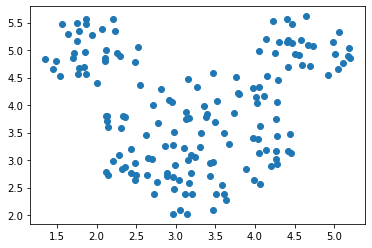

In [38]:
plt.scatter(mouse['x_scaled'], mouse['y_scaled'])
plt.show()

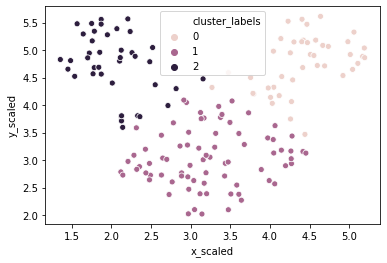

In [39]:
# Import the kmeans and vq functions
from scipy.cluster.vq import vq, kmeans

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

In [42]:
np.random.seed([1000, 2000])

fifa['scaled_phy'] = fifa['phy']/fifa['phy'].std()
fifa['scaled_def'] = fifa['def']/fifa['def'].std()

                scaled_def  scaled_phy
cluster_labels                        
0                 1.947323    7.159652
1                 3.815935    9.015941
2                 2.071767    9.061793


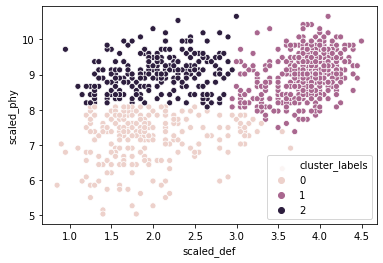

In [48]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())


# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()